In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 다른 데이터들과 합치기

In [35]:
import math
# 평균을 구하고 모두 소수 2번쨰까지만 살리기
nba_all_group = nba_all.groupby('player_name',as_index=False).mean()
for i in range(nba_all_group.shape[0]):
    for i2 in range(len(list(nba_all_group.columns))):
        if i2 == 0:
            continue
        elif i2 == 1:
            nba_all_group.iloc[i,i2] =  nba_all_group.iloc[i,i2].astype('int64')
        else:
            nba_all_group.iloc[i,i2] = round(nba_all_group.iloc[i,i2],2)

nba_all_group['age'] = nba_all_group['age'].astype('int64')
nba_all_group.head()

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,A.C. Green,35,205.74,102.06,75.80,5.78,6.06,0.86,-1.88,0.09,0.19,0.13,0.49,0.05
1,A.J. Bramlett,23,208.28,102.97,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00
2,A.J. Guyton,24,185.42,81.65,26.67,3.80,0.70,1.57,-6.70,0.01,0.04,0.22,0.32,0.28
3,AJ Hammons,24,213.36,117.93,22.00,2.20,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04
4,AJ Price,25,187.96,84.82,43.50,5.35,1.33,2.00,-2.23,0.02,0.09,0.21,0.48,0.25


In [36]:
df_merge = pd.merge(df_merge1,nba_all_group,left_on='Relinquished',right_on='player_name',how='left').\
drop('age_y',axis=1).rename(columns={'age_x':'age'})

df_merge.drop('player_name',axis=1,inplace=True)

df_merge['Notes'] = df_merge['Notes'].astype(int)
df_merge.head()

,Relinquished,outnum,tf2num,age,season,Notes,position,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Aaron Brooks,0,0,35,10,9,G,182.88,73.03,64.50,8.88,1.55,2.76,-3.31,0.02,0.07,0.22,0.52,0.23
1,Aaron Gray,0,0,30,7,14,C,213.36,122.47,45.43,3.24,3.73,0.66,-4.73,0.13,0.23,0.15,0.53,0.09
2,Adam Morrison,1,1,29,3,8,F,203.20,92.99,53.67,6.07,1.80,1.17,-7.83,0.03,0.10,0.19,0.44,0.11
3,Adonal Foyle,1,0,35,12,18,C,208.28,118.88,61.08,3.78,4.48,0.44,-4.40,0.11,0.19,0.13,0.50,0.04
4,Al Harrington,0,1,35,16,15,F,205.74,112.49,61.31,12.20,5.13,1.52,-1.45,0.06,0.17,0.23,0.51,0.10


# Tensorflow Regression

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import seaborn as sns

print(tf.__version__)

2.1.0


# 문자로 된 행들 라벨링

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# object인 컬럼만 찾기
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Relinquished   157 non-null    object 
 1   outnum         157 non-null    int64  
 2   tf2num         157 non-null    int64  
 3   age            157 non-null    int64  
 4   season         157 non-null    int64  
 5   Notes          157 non-null    int32  
 6   position       157 non-null    object 
 7   player_height  157 non-null    float64
 8   player_weight  157 non-null    float64
 9   gp             157 non-null    float64
 10  pts            157 non-null    float64
 11  reb            157 non-null    float64
 12  ast            157 non-null    float64
 13  net_rating     157 non-null    float64
 14  oreb_pct       157 non-null    float64
 15  dreb_pct       157 non-null    float64
 16  usg_pct        157 non-null    float64
 17  ts_pct         157 non-null    float64
 18  ast_pct   

In [37]:
encoder = LabelEncoder()
encoder.fit(list(df_merge['Relinquished']))
digit_label_Relinquished = encoder.transform(df_merge['Relinquished'])
print(digit_label_Relinquished)

encoder.fit(list(df_merge['position']))
digit_label_position = encoder.transform(df_merge['position'])
print(digit_label_position)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156]
[5 0 2 0 2 0 5 2 2 0 2 5 5 2 3 1 2 1 5 2 2 2 2 3 5 5 5 5 1 5 6 2 5 5 2 0 5
 3 2 0 4 5 2 4 5 3 5 0 2 2 6 3 5 2 0 0 6 2 2 0 0 5 2 5 5 5 3 2 2 0 2 5 2 5
 2 5 5 2 5 5 3 5 4 0 2 6 6 5 5 2 2 2 0 5 4 2 2 1 1 1 5 6 2 0 3 5 5 0 2 2 0
 2 5 3 5 5 5 2 2 2 2 5 0 0 5 2 0 3 1 2 0 5 6 6 4 5 5 5 5 5 2 0 1 1 0 6 5 5
 6 2 6 0 5 0 2 2 0]


In [38]:
# 새로운 컬럼으로 넣어주기
df_merge['Relinquished_digit'] = digit_label_Relinquished
df_merge['position_digit'] = digit_label_position
df_merge_renew  = df_merge.drop(['Relinquished','position'],axis=1)

df_merge_renew.head()

,outnum,tf2num,age,season,Notes,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Relinquished_digit,position_digit
0,0,0,35,10,9,182.88,73.03,64.50,8.88,1.55,2.76,-3.31,0.02,0.07,0.22,0.52,0.23,0,5
1,0,0,30,7,14,213.36,122.47,45.43,3.24,3.73,0.66,-4.73,0.13,0.23,0.15,0.53,0.09,1,0
2,1,1,29,3,8,203.20,92.99,53.67,6.07,1.80,1.17,-7.83,0.03,0.10,0.19,0.44,0.11,2,2
3,1,0,35,12,18,208.28,118.88,61.08,3.78,4.48,0.44,-4.40,0.11,0.19,0.13,0.50,0.04,3,0
4,0,1,35,16,15,205.74,112.49,61.31,12.20,5.13,1.52,-1.45,0.06,0.17,0.23,0.51,0.10,4,2


In [39]:
train_set = df_merge_renew.sample(frac=.8, random_state=0)
test_set = df_merge_renew.drop(train_set.index)

In [44]:
# sns.pairplot(train_set[['Relinquished', 'outnum', 'tf2num', 'age', 'season', 'Notes',
#        'position', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
#        'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']], diag_kind='kde')

In [49]:
train_state = train_set.describe()
train_state.pop('age')
train_state = train_state.T

In [50]:
y_train = train_set.pop('age')
y_test = test_set.pop('age')

In [51]:
def norm(x):
    return (x - train_state['mean']) / train_state['std']

norm_train_set = norm(train_set)
norm_test_set = norm(test_set)

In [53]:
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[len(train_set.keys())]),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse', optimizer = optimizer, metrics=['mae', 'mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                950       
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 3,551
Trainable params: 3,551
Non-trainable params: 0
_________________________________________________________________


In [47]:
ary = np.array(norm_train_set)

In [54]:
sample_result = model.predict(norm_train_set[:10])
sample_result

array([[ 0.09454657],
       [ 0.601721  ],
       [-0.17549348],
       [ 0.15665752],
       [ 0.1922263 ],
       [ 0.2839901 ],
       [-0.67191756],
       [ 0.87348086],
       [ 0.7287873 ],
       [-0.04939486]], dtype=float32)

In [61]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:print('')
        print(',', end='')
        
history = model.fit(norm_train_set, y_train, epochs=1000, validation_split=.2, verbose=0, callbacks=[PrintDot()])


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [62]:
loss, mae, mse = model.evaluate(norm_test_set, y_test,verbose=1)
print('평균 절대 오차 : ',mae)

31/31 [==============================] - 0s 130us/sample - loss: 24.5069 - mae: 3.4981 - mse: 24.5069
평균 절대 오차 :  3.4980714


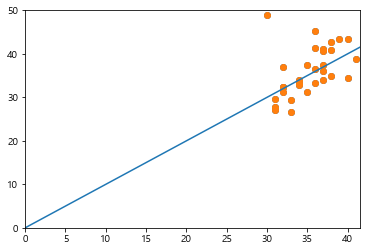

In [63]:
import matplotlib.pyplot as plt
# 시각화
y_pred = model.predict(norm_test_set).flatten()
plt.scatter(y_test, y_pred)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.scatter(y_test, y_pred)
_ = plt.plot([-100,100],[-100,100])
plt.show()

In [64]:
hist = pd.DataFrame(history.history)
hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,0.048088,0.187764,0.048088,27.995174,4.338243,27.995174
1,0.165541,0.346067,0.165541,29.397552,4.436774,29.397552
2,0.192880,0.350507,0.192880,30.195906,4.456219,30.195906
3,0.047925,0.153903,0.047925,30.035641,4.491194,30.035641
4,0.076305,0.210085,0.076305,29.289900,4.433384,29.289900
...,...,...,...,...,...,...
995,0.209856,0.370809,0.209856,29.700954,4.519504,29.700954
996,0.121295,0.270012,0.121295,28.152412,4.381316,28.152412
997,0.076660,0.216494,0.076660,29.306955,4.491955,29.306955
998,0.197477,0.392224,0.197477,29.195749,4.513596,29.195749


# 클래스 만들기

### 아킬레스, 십자인대 df 만들기

In [ ]:
df = pd.read_csv('nba_injury_1998.csv')

class AclAndAchilles:
    def __init__(self, df):
        self.df = df
        self.yes_no_df()
        self.seasonout_df()
        self.yes_no2_df()
        self.one_or_zero_df()
        
    # 우선은 ACL과 아킬레스가 들어간  선수 구분
    def yes_no(x):
        words = x.split(' ')
        print(words)
        for word in words:
            if word.upper() in ['ACL', 'PCL', 'ACHILLES']:
                return True
                break   
                
    def yes_no_df(self):
        self.df['tf'] =  self.df['Notes2'].apply(lambda x:yes_no(x))
        
    # 시즌아웃 부상
    def seasonout(x):
        words = re.split('\(|\)', x)
        print(words)
        for word in words:
            if word in ['out for season']:
                return True
                break
                
    def seasonout_df(self):
        self.df['out']  = self.df['Notes2'].apply(lambda x:seasonout(x))
            
    # 횟수 카운트
    def yes_no2(x):
        words = x.split(' ')
        print(words)
        sum_sum = 0
        for word in words:
            if word.upper() in ['ACL', 'PCL', 'ACHILLES'] or word.upper() in['TORN','RUPTURE']:
                sum_sum += 1
            if sum_sum >= 2:
                return True
                break   
            
    def yes_no2_df(self):
        self.df['tf2'] = self.df['Notes2'].apply(lambda x:yes_no2_df(x))
        
    # 아킬레스와 십자인대 부상 전적 여부
    def one_or_zero(x):
        two=0
        three=0
        if x['out'] == True:
            two = 1
        if  x['tf2'] == True:
            three = 1
        print(two, three)    
        return  pd.Series([two,three])
    
    def one_or_zero_df(self):
        self.df[['outnum','tf2num']] = self.df[['out','tf2']].apply(one_or_zero,axis=1)
        
    def df1(self):
        return  self.df.groupby('Relinquished',as_index=False).agg({'outnum':'sum','tf2num':'sum'})

### 다른 데이터와 합치기

In [ ]:
injury_df = pd.read_csv('nba_injury_merge_position.csv')
nba_all = pd.read_csv('all_seasons.csv').drop('Unnamed: 0',axis=1)

class injury:
    def __init__(self, acl_achilles_df, injury_df, nba_all_df):
        self.acl_achilles_df = acl_achilles_df
        self.injury_df = injury_df
        self.nba_all_df = nba_all_df
        
    def merge(self):
        self.df_merge1 = pd.merge(self.acl_achilles_df,self.injury_df,left_on='Relinquished',right_on='name').drop('name',axis=1)